In [1]:
import geopandas as gpd

# Load the GeoJSON file (adjust the path as needed)
gdf = gpd.read_file("C:/Users/picokatx/Documents/pathfinding-project/pathfinding-project/app/pathfinder/assets/data/josm/main.geojson")

In [21]:
import seaborn as sns

# Get unique categories
categories = gdf['amenity'].dropna().unique()

# Create color palette using Seaborn
palette = sns.color_palette("husl", n_colors=len(categories))  # Other options: "Set2", "tab20", "dark"
color_mapping = {cat: palette[i] for i, cat in enumerate(categories)}

# Convert to hex colors and handle missing values
gdf['color_column'] = gdf['amenity'].map(
    lambda x: sns.color_palette("husl", len(categories))[list(categories).index(x)] if x in categories else '#d3d3d3'
).apply(sns.color_palette("husl", len(categories))[list(categories).index(x)] if x in categories else '#d3d3d3').apply(sns.color_palette.as_hex)

# Plot with Seaborn colors
gdf.plot(figsize=(12, 8), color='none', edgecolor='color_column', alpha=0.8)

NameError: name 'x' is not defined

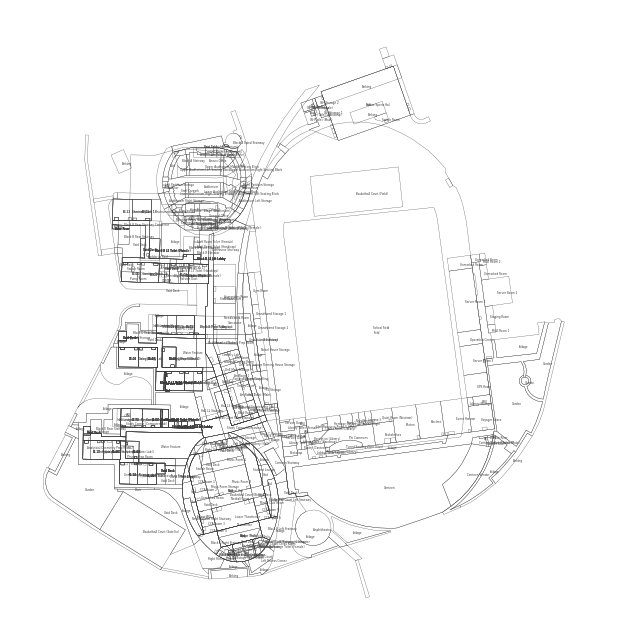

In [10]:
# Basic plot with specified figure size
import pandas as pd
ax = gdf.plot(figsize=(12, 8), color='none', edgecolor='#3A3A3A', linewidth=0.2)

# Add text labels for names
for idx, row in gdf.iterrows():
    if pd.notna(row['name']):  # Only add labels for features with names
        # Get centroid coordinates of the geometry
        x, y = row.geometry.centroid.coords[0]
        ax.annotate(
            text=row['name'],
            xy=(x, y),
            ha='left',  # Horizontal alignment to left
            va='top',   # Vertical alignment to top
            fontsize=2,
            color='#3A3A3A'
        )

ax.set_axis_off()
ax.figure.set_facecolor('none')
ax.figure.savefig('output_w_names.svg', format='svg', transparent=True)

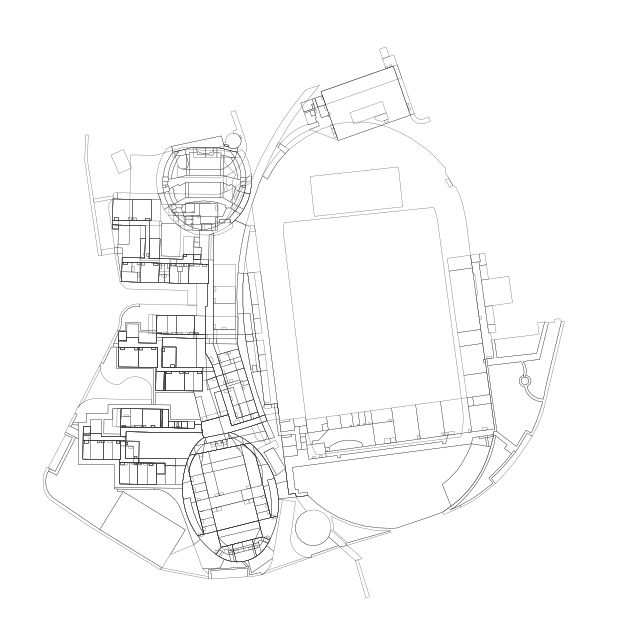

In [26]:
# Basic plot with specified figure size
ax = gdf.plot(figsize=(12, 8), color='none', edgecolor='#3A3A3A', linewidth=0.2)
ax.set_axis_off()  # Remove axes
ax.figure.set_facecolor('none')  # Make figure background transparent

# Export as SVG
ax.figure.savefig('output_w_names.svg', format='svg', transparent=True)

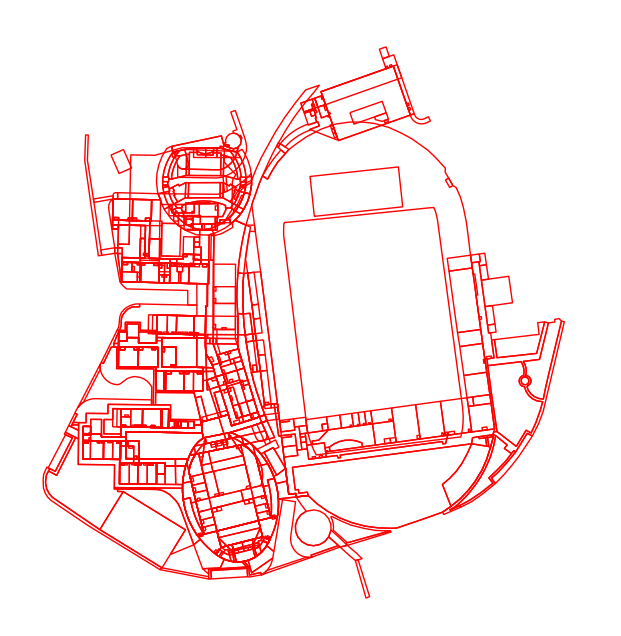

In [22]:
# Basic plot with specified figure size
ax = gdf.plot(figsize=(12, 8), color='none', edgecolor='red')
ax.set_axis_off()  # Remove axes
ax.figure.set_facecolor('none')  # Make figure background transparent

In [10]:
gdf

,crossing,door,access,name,amenity,landuse,traversal,service,utility,indoor,level,lanes:forward,lanes:backward,highway,oneway,lanes,geometry
0,None,no,yes,None,None,None,None,None,None,None,2,None,None,None,None,None,"LINESTRING (103.76926 1.30635, 103.76926 1.30634)"
1,None,None,None,Parking,None,parking,None,None,None,area,1,None,None,None,None,None,"POLYGON ((103.76936 1.30574, 103.76936 1.30570..."
2,unmarked,None,None,None,None,None,None,None,None,corridor,1,None,None,None,None,None,"POLYGON ((103.76935 1.30571, 103.76916 1.30575..."
3,None,no,yes,None,None,None,None,None,None,None,2,None,None,None,None,None,"LINESTRING (103.77026 1.30763, 103.77027 1.30761)"
4,None,None,None,None,None,None,None,None,None,corridor,5,None,None,None,None,None,"POLYGON ((103.76918 1.30737, 103.76918 1.30736..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,None,None,None,Auditorium,events_venue,None,None,None,None,wall,4-6,None,None,None,None,None,"LINESTRING (103.76947 1.30748, 103.76944 1.307..."
1039,None,yes,yes,None,None,None,None,None,None,None,3,None,None,None,None,None,"POLYGON ((103.76979 1.30765, 103.76980 1.30765..."
1040,None,yes,yes,None,None,None,None,None,None,None,2,None,None,None,None,None,"POLYGON ((103.76941 1.30628, 103.76941 1.30627..."
1041,None,no,yes,None,None,None,None,None,None,None,6,None,None,None,None,None,"LINESTRING (103.76927 1.30747, 103.76926 1.30747)"
